# Distribución Binomial

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from dist_prob_plotgraphs import plot_binom

## Forma de consegir emlpeo
+ En una encuesta: de 703 empleados elegidos al azar, el 61% obtuvo trabajo por medio de redes de contactos. 
+ Utilice los datos muestrales, con un nivel de significancia de 0.05, para probar la aseveración de que
    + la mayoría de los empleados (más del 50%) consiguen su trabajo por medio de redes de contactos. 
+ El siguiente es un resumen de la aseveración y de los datos muestrales:
    + Aseveración: La mayoría de los empleados consigue trabajo por medio de redes de contactos. 
        + Es decir, p > 0.5.
        + Datos muestrales:
            + n=703
            + pˆ=0.61

mean: 351.5, var: 175.75, skew: 0.0, kurt: -0.002844950213371266


(<Figure size 640x480 with 1 Axes>, <Axes: >)

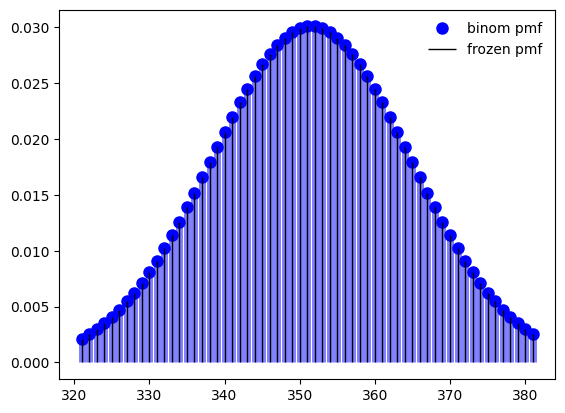

In [7]:
# crea una distribución binomial con una muestra de tamaño 100 y una proporción del 40%
n=703
p=0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# imprime sus estadísticos
print(f"mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# plotea la función de distribución
plot_binom(n, p)

## Nivel de significancia alfa
1. Alfa bilateral (opuesto a nivel de signigicancia)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

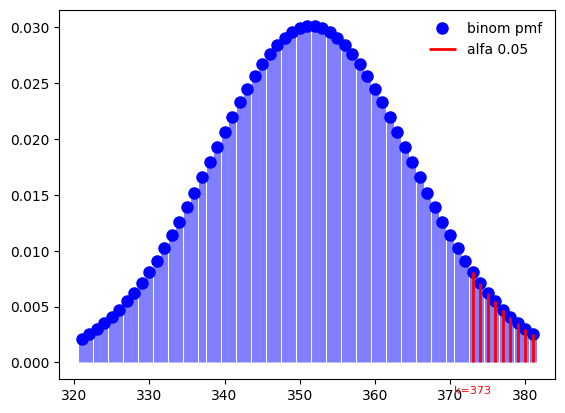

In [8]:
# Grafica la función indicando un nivel de Significancia alfa del 5% bilateral
# n: tamaño muestra 703, p: proporción 0.P0=0.5, alfa: nivel de significancia 0.05 (1-nivel de confianza)
plot_binom(n, p, tipo='right')

## Potencia de una Prueba de Hipótesis
+ Suponga que tenemos la hipótesis nula, la hipótesis alternativa, el nivel de significancia y los datos muestrales siguientes
    + H0: p = 0.5 
    + H1: p > 0.5.      
    + Nivel de significancia: alfa = 0.05
    + Tamaño muestral: n = 703
    + Proporción muestral: pˆ = 61/100*703

### Resolución por scipy
+ Utilizamos la distribución binom(n,p) para comparar la media H0 con la H1 y su p-value correspondiente.
+ Se grafica para tener interpretación por visualización.

Estadísticos del caso: mean: 351.5, var: 175.75, skew: 0.0, kurt: -0.002844950213371266


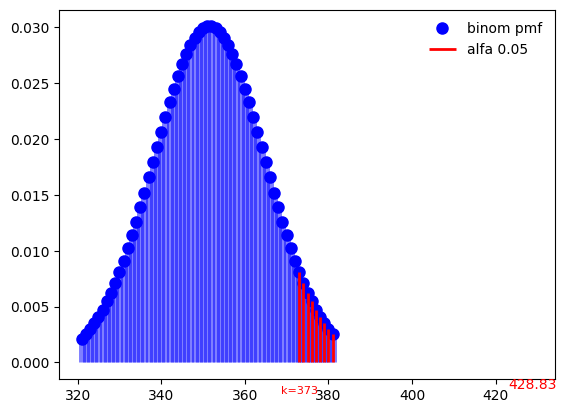

k(H0 = p0 = mean) = 351.5       k(1-alfa) = 373.0       k(H1 = p1 = p_hat) = 428.83
p_value:  2.7521904307267533e-09       vs          alfa: 0.05


In [17]:
# crea una distribución binomial con una muestra de tamaño 703 y una proporción del 50% P0 de H0
alfa = 0.05
n=703
p=0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# imprime sus estadísticos
print(f"Estadísticos del caso: mean: {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

p_hat = 0.61            # p gorro es la proporción de la hipótesis alternativa
k_p_hat = p_hat * 703   # a p gorro le corresponde un valor k o x proporcional

# Dibujar la distribución y las zonas críticas
fig, ax = plot_binom(n, p, tipo='right')
# Dibujar las líneas punteadas en pmf(H1)
ax.plot([k_p_hat, k_p_hat], [0, binom(n, p).pmf(k_p_hat)], linestyle="dashed", color='r')
ax.text(k_p_hat, -0.002, f"{k_p_hat}", ha='center', va='center', fontsize=10, color='red')
plt.show()

p_value = binom(n,p).sf(k_p_hat)

print(f"k(H0 = p0 = mean) = {mean}       k(1-alfa) = {binom.ppf(1-alfa, n, p)}       k(H1 = p1 = p_hat) = {k_p_hat}")
print(f"p_value:  {p_value}       vs          alfa: {0.05}")

### Resolución por formulas clásicas
+ Utilizamos el estadístico estandarizado z y la aproximación normal
+ La formula es z= (p_hat - p_0)/ sqrt(p_0 * q_0/n)

In [18]:
# Datos muestrales
n = 703
p_hat = 0.61
p_0 = 0.5

# Cálculo del estadístico de prueba z
z = (p_hat - p_0) / math.sqrt((p_0 * (1 - p_0)) / n)

# Valor p correspondiente
p_value = 1 - norm.cdf(z)

print(f"alfa: {p_0}, z(alfa): {1,645}, z de prueba: {z}. p_value: {p_value}.")

alfa: 0.5, z(alfa): (1, 645), z de prueba: 5.833112376767654. p_value: 2.7201449981362202e-09.


**Observaciones**
+ Con los dos métodos de cálculo se obtienen los mismos resultados
+ El estadístico de prueba está lejos **dentro de la zona crítica**
    + k(1-alfa) es menor que k(H1)
    + El valor del estadístico de prueba z es mayor que el valor Z(alfa)
+ La probabilidad p_value es lejos menor que la probabilidad alfa
    + con ambos métodos p_value = 2.752e-09 y esto es notablemente menor que 0.05
+ **La hipótesis nula no resulta aceptable y dodría ser rechazada**

**Conclusiones**
+ Hay suficiente evidencia para apoyar la aseveración de que la mayoría de los empleados (> 50%)
    + consiguen su trabajo por medio de redes de contactos.

______________________________________________________________________________________________________________________________________________________________________
